In [1]:
import os, sys

sys.path.append(os.path.join(os.getcwd(), '../src/'))
from data_reader.data_reader import DataReader

In [2]:
dr = DataReader()
shot_df = dr.read_shots("shots-20201201010000", start_shot_number=1, end_shot_number=4)
shot_df.head()

,timestamp,sequential_number,sequential_number_by_shot,displacement,load01,load02,load03,load04,shot_number,tags
0,1.606752e+09,0,0,49.171,0.568421,0.526316,0.597368,0.502632,1,"[異常A, 異常B]"
1,1.606752e+09,1,1,49.245,0.550000,0.526316,0.623684,0.507895,1,"[異常A, 異常B]"
2,1.606752e+09,2,2,49.136,0.568421,0.510526,0.660526,0.521053,1,"[異常A, 異常B]"
3,1.606752e+09,3,3,49.184,0.600000,0.502632,0.678947,0.521053,1,"[異常A, 異常B]"
4,1.606752e+09,4,4,49.149,0.578947,0.473684,0.671053,0.521053,1,"[異常A, 異常B]"


In [3]:
shots_meta_df = dr.read_shots_meta("shots-meta-20201201010000")
shots_meta_df.head()

,shot_number,spm,num_of_samples_in_cut_out
0,1,80.598572,3125.0
1,2,80.613753,3113.0
2,3,80.594235,3129.0
3,4,80.636509,3097.0
4,5,80.582338,3140.0


In [4]:
from analyze.h_one_extract_features import *

# spm = shots_meta_df[shots_meta_df.shot_number == 1].spm
# # print(f"spm: {spm}")

# max_indies, max_values = extract_features(shot_df, spm, max_load)
# print(max_indies, max_values)

# start_indies, start_values = extract_features(shot_df, spm, load_start2)
# print(start_indies, start_values)

# break_indies, break_values = extract_features(shot_df, spm, breaking)
# print(break_indies, break_values)

Loading BokehJS ...

In [5]:
# from analyze.analyze import *
# main(target="20201201010000")


In [6]:
shot_df

,timestamp,sequential_number,sequential_number_by_shot,displacement,load01,load02,load03,load04,shot_number,tags
0,1.606752e+09,0,0,49.171,0.568421,0.526316,0.597368,0.502632,1,"[異常A, 異常B]"
1,1.606752e+09,1,1,49.245,0.550000,0.526316,0.623684,0.507895,1,"[異常A, 異常B]"
2,1.606752e+09,2,2,49.136,0.568421,0.510526,0.660526,0.521053,1,"[異常A, 異常B]"
3,1.606752e+09,3,3,49.184,0.600000,0.502632,0.678947,0.521053,1,"[異常A, 異常B]"
4,1.606752e+09,4,4,49.149,0.578947,0.473684,0.671053,0.521053,1,"[異常A, 異常B]"
...,...,...,...,...,...,...,...,...,...,...
9362,1.606752e+09,9362,3124,34.116,1.723684,1.305263,-0.984211,0.123684,3,"[異常A, 異常B]"
9363,1.606752e+09,9363,3125,34.068,1.757895,1.326316,-0.942105,0.150000,3,"[異常A, 異常B]"
9364,1.606752e+09,9364,3126,34.042,1.765789,1.321053,-0.889474,0.152632,3,"[異常A, 異常B]"
9365,1.606752e+09,9365,3127,34.033,1.776316,1.313158,-0.842105,0.178947,3,"[異常A, 異常B]"


2021-01-22 18:32:11,231 [INFO] NumExpr defaulting to 8 threads.


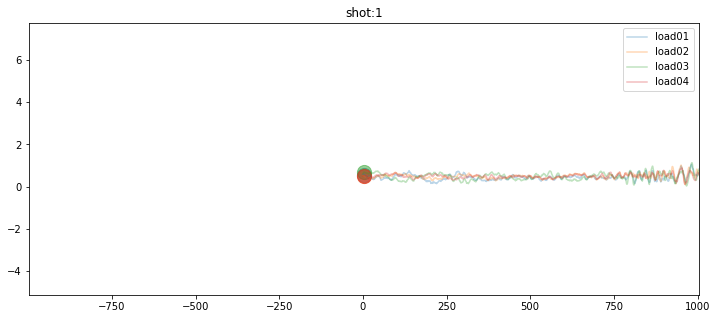

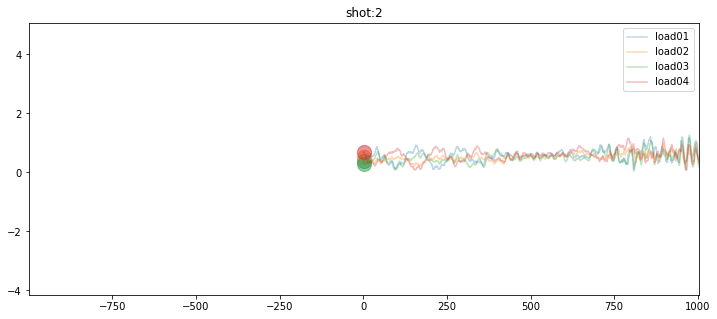

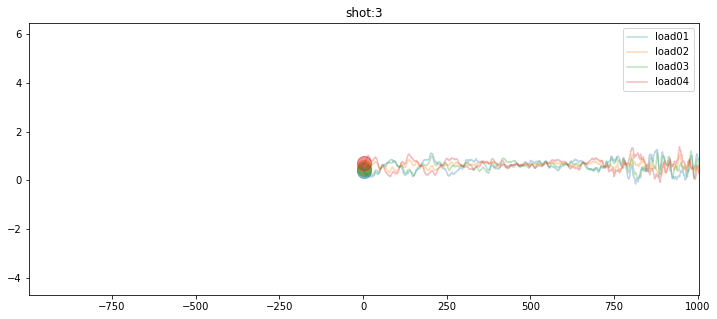

In [7]:
for shot in [1, 2, 3]:
    shot_data = shot_df[shot_df.shot_number == shot]
    shot_data = shot_data.reset_index()

    argmax,valmax = extract_features(shot_data, 80.0, breaking, shot=shot, disp_chart=True) 

In [11]:
shot = 1
shot_data = shot_df[shot_df.shot_number == shot]


/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/l

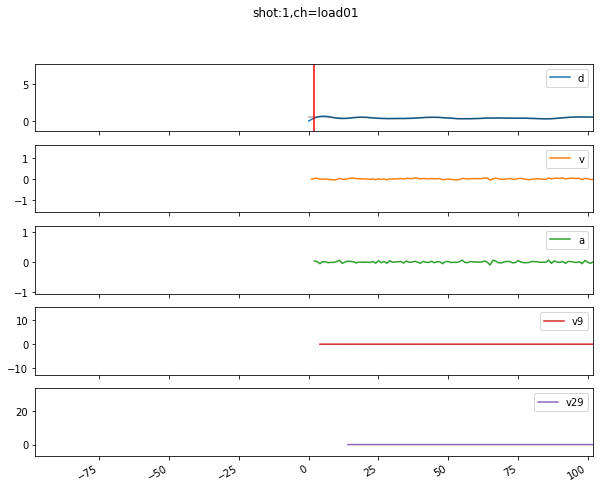

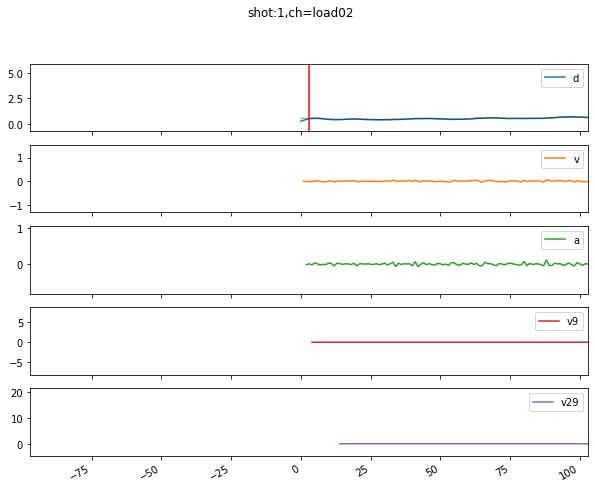

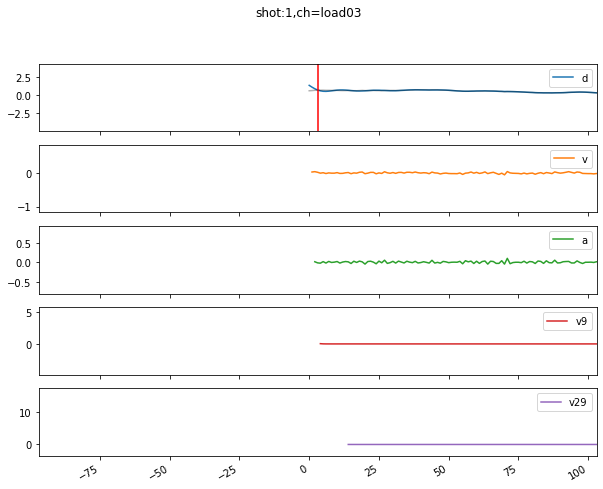

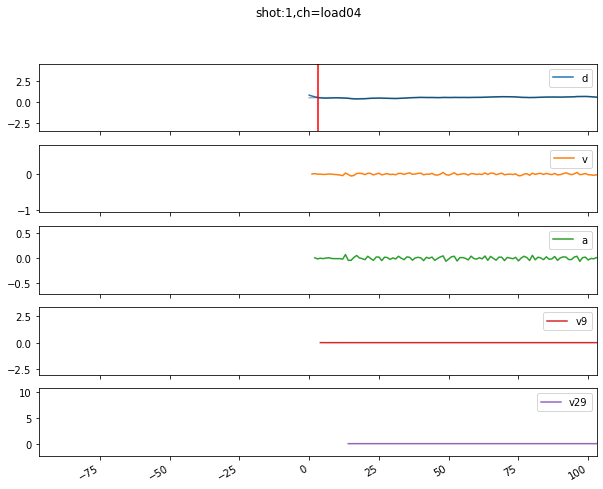

In [16]:
argmax,valmax = extract_features(shot_data, 80.0, breaking, shot=shot, Debug=True)

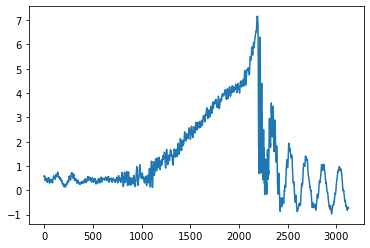

In [15]:
shot_data.load01.plot()

/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/l

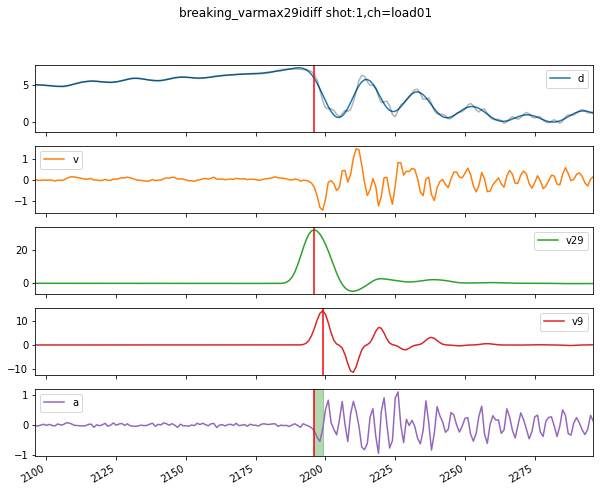

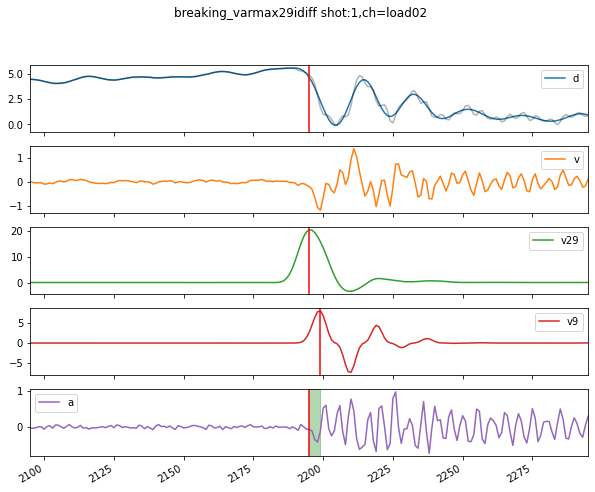

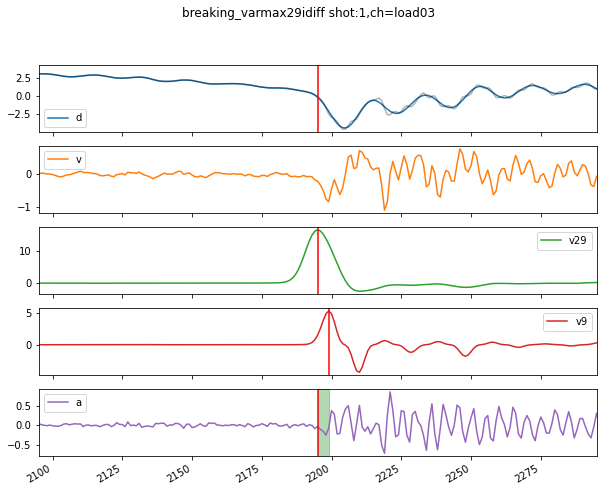

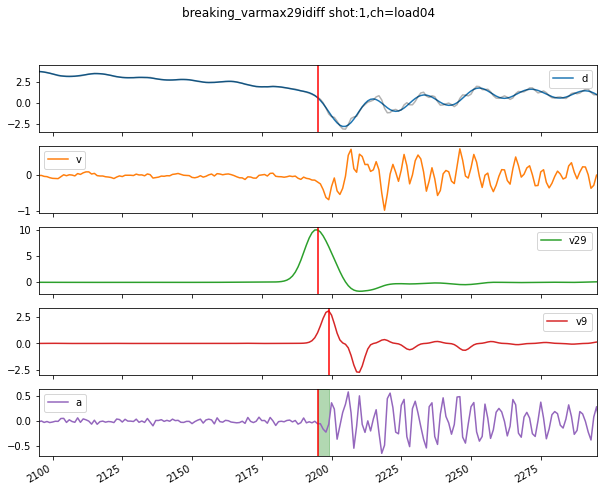

In [26]:
from fft_tools import *
argmax,valmax = extract_features(shot_data, 80.0, breaking_varmax29idiff, shot=shot, Debug=True)

In [25]:
def _idiff(x):
    # 必ずraw=Trueで呼ぶこと。
    # x は窓内の値が入った配列                                                                                                                                          # x[0]が最も古い、x[-1]が最も新しい値
    # 集計後の値を return する
    i_width = int(len(x)/2)
    return x[-i_width:].mean() - x[:i_width].mean()

def breaking_varmax29idiff(d, spm, fs=100000,low=0, high=8000, r_window=19,Debug=False,shot=9999,ch='loadxx'):
    """ 破断点
    :d (np.array)        荷重系列データ
    :spm (float)         SPM(shots per minutes)、荷重開始→ 最大→ 破断の推移の速度にほぼ反比例すると考え>られる。今のところ未使用。
    :fs (int)            サンプリング周波数(Hz)
    :low (int)           バンドパスフィルタ下限周波数
    :high (float)        バンドパスフィルタ上限周波数
    :r_window (int)      移動平均ウィンドウ範囲
    :Debug (bool)        グラフ表示
    :return (int,float)  最大荷重点index, 最大荷重値

    ToDo: 低SPMではバンドパスノイズの影響が前方に及んでるケースがある。
          低SPM時はノイズ除去の必要性が大きくないはずなので調整の余地あり。
    """
    df = pd.DataFrame({'o':d})
    s,f,p = fft_spectrum(df.o,fs=fs)                      # FFT
    df['d'] = bandpass_ifft(s,f,low,high).real            # バンドパス
    df['v'] = df.o.diff()                                 # 速度
    df['a'] = df.v.diff()                                 # 加速度
    df['v9'] =  (df.d.rolling(9,center=True).var() * -df.d.rolling(9,center=True).apply(_idiff))
    df['v29'] = (df.d.rolling(29,center=True).var() * -df.d.rolling(29,center=True).apply(_idiff))
    varmax9idiff =  df.v9.argmax()
    varmax29idiff = df.v29.argmax()
    h = varmax29idiff
#     if varmax29idiff >= varmax9idiff:                     # varmaxにidiffをかけることで下降局面に絞る; 731:1
#         h = varmax9idiff                                  #
#     else:                                                 #
#         h = df[varmax29idiff:varmax9idiff]['a'].argmin()  #

    if Debug is True:
        ax = df[['d','v','v29','v9','a']].plot(figsize=(10,8),subplots=True,c='b',
                title='%s shot:%d,ch=%s'%(sys._getframe().f_code.co_name,shot,ch))
        df.o.plot(ax=ax[0],alpha=.3,c='black'); plt.xlim(h-100,h+100)
        ax[0].axvline(h,c='r'); #ax[2].axhline(criteria,c='g')
        ax[2].axvline(varmax29idiff,c='r'); #ax[2].axhline(criteria,c='g')
        ax[3].axvline(varmax9idiff,c='r'); #ax[2].axhline(criteria,c='g')
        ax[4].axvspan(varmax29idiff,varmax9idiff,color='g',alpha=.3)
        ax[4].axvline(h,c='r'); #ax[2].axhline(criteria,c='g')

    # 値として元波形 or ノイズ除去後のいずれを採用すべきかは個々に判断されるべきと考えるので、
    # indexと併せて(ノイズ除去後の)値も返す仕様とする。
    return h, df.o[h]
